In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
fig_size = plt.rcParams['figure.figsize']

fig_size[0] = 10

fig_size[1] = 8

plt.rcParams['figure.figsize'] = fig_size
from matplotlib import rc
import seaborn as sns
%matplotlib inline

# Exploración de los datos

In [8]:
df = pd.read_csv('Dataset/kc_house_data.csv')
df.head()

id             date     price  bedrooms  bathrooms  sqft_living  \
0  7129300520  20141013T000000  221900.0         3       1.00         1180   
1  6414100192  20141209T000000  538000.0         3       2.25         2570   
2  5631500400  20150225T000000  180000.0         2       1.00          770   
3  2487200875  20141209T000000  604000.0         4       3.00         1960   
4  1954400510  20150218T000000  510000.0         3       2.00         1680   

   sqft_lot  floors  waterfront  view  ...  grade  sqft_above  sqft_basement  \
0      5650     1.0           0     0  ...      7        1180              0   
1      7242     2.0           0     0  ...      7        2170            400   
2     10000     1.0           0     0  ...      6         770              0   
3      5000     1.0           0     0  ...      7        1050            910   
4      8080     1.0           0     0  ...      8        1680              0   

   yr_built  yr_renovated  zipcode      lat     long  sqft_living15  \
0      1955             0    98178  47.5112 -122.257           1340   
1      1951          1991    98125  47.7210 -122.319           1690   
2      1933             0    98028  47.7379 -122.233           2720   
3      1965             0    98136  47.5208 -122.393           1360   
4      1987             0    98074  47.6168 -122.045           1800   

   sqft_lot15  
0        5650  
1        7639  
2        8062  
3        5000  
4        7503  

[5 rows x 21 columns]

In [9]:
df.shape

(21613, 21)

In [10]:
#Tabla con los precios del dataset
precios = df['price']
precios.head()

0    221900.0
1    538000.0
2    180000.0
3    604000.0
4    510000.0
Name: price, dtype: float64

In [11]:
#Precio mínimo en el dataset
min_precio = np.amin(precios)
#Precio máximo en el dataset
max_precio = np.amax(precios)
#Media del precio en el dataset
media_precio = np.mean(precios)
#Mediana del precio en el dataset
mediana_precio = np.median(precios)
#Desviación estándar del precio en el dataset
std_precio = np.std(precios)

#Resultados
print("Resultados:")
print("Precio mínimo: ${}".format(min_precio))
print("Precio máximo: ${}".format(max_precio))
print("Media: ${}".format(media_precio))
print("Mediana: ${}".format(mediana_precio))
print("Desviación Estándar: ${}".format(std_precio))

Resultados:
Precio mínimo: $75000.0
Precio máximo: $7700000.0
Media: $540088.1417665294
Mediana: $450000.0
Desviación Estándar: $367118.7031813723


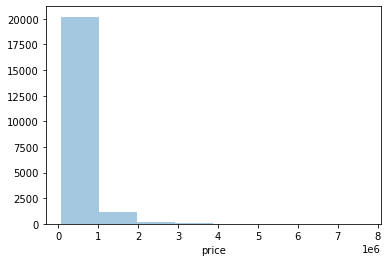

In [15]:
#Distribución del precio
sns.distplot(df['price'], kde=False, bins=8)

## Correlacion entre las variables y precio

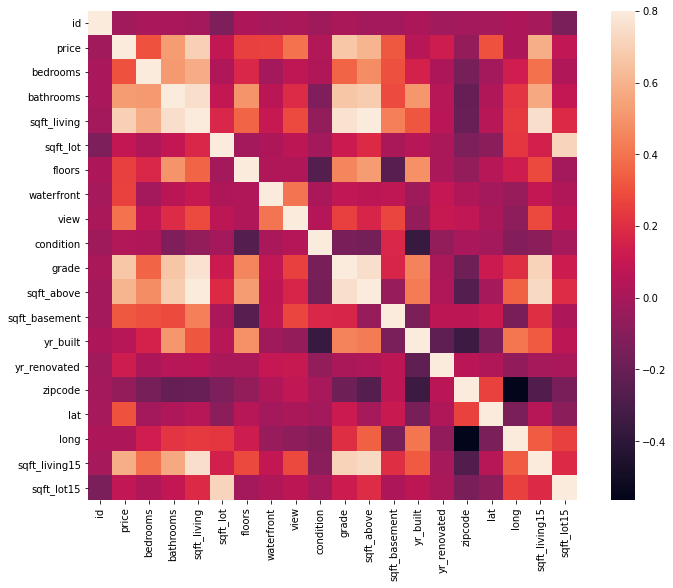

In [17]:
#Matriz de correlacion
matcorr = df.corr()
f, ax = plt.subplots(figsize = (12, 9))
sns.heatmap(matcorr, vmax = .8, square = True)

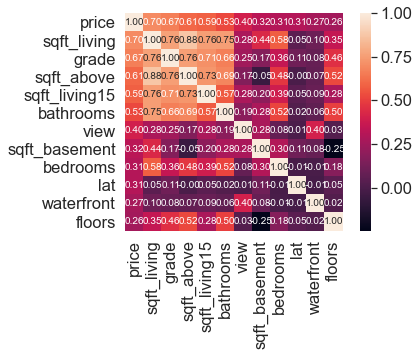

In [19]:
#Primeras 12 variables mas correlacionadas
n = 12 #numero de variables a utilizar para la matriz
col = matcorr.nlargest(n, 'price')['price'].index
cm = np.corrcoef(df[col].values.T)
sns.set(font_scale = 1.5)
hm = sns.heatmap(cm, annot = True, square = True, fmt = '.2f', annot_kws = {'size': 10}, yticklabels = col.values, xticklabels = col.values)
plt.show()

In [20]:
#Tabla con las variables mas correlacionadas con precio
mas_corr = pd.DataFrame(col)
mas_corr.columns = ['Variables mas correlacionadas']
mas_corr

Variables mas correlacionadas
0                          price
1                    sqft_living
2                          grade
3                     sqft_above
4                  sqft_living15
5                      bathrooms
6                           view
7                  sqft_basement
8                       bedrooms
9                            lat
10                    waterfront
11                        floors

## Limpieza del dataset

In [53]:
#Buscando valores nulos en el dataset
nan_rows = df[df.isnull().any(1)]
nan_rows

Empty DataFrame
Columns: [id, date, price, bedrooms, bathrooms, sqft_living, sqft_lot, floors, waterfront, view, condition, grade, sqft_above, sqft_basement, yr_built, yr_renovated, zipcode, lat, long, sqft_living15, sqft_lot15]
Index: []

[0 rows x 21 columns]

In [54]:
#Dataset final a utilizar, con las 12 caracteristicas mas correlacionadas
dataset = df.copy().drop(['id', 'date', 'sqft_lot', 'yr_built', 'yr_renovated', 'zipcode', 'long', 'sqft_lot15', 'condition'], axis = 1)
dataset.head()

price  bedrooms  bathrooms  sqft_living  floors  waterfront  view  \
0  221900.0         3       1.00         1180     1.0           0     0   
1  538000.0         3       2.25         2570     2.0           0     0   
2  180000.0         2       1.00          770     1.0           0     0   
3  604000.0         4       3.00         1960     1.0           0     0   
4  510000.0         3       2.00         1680     1.0           0     0   

   grade  sqft_above  sqft_basement      lat  sqft_living15  
0      7        1180              0  47.5112           1340  
1      7        2170            400  47.7210           1690  
2      6         770              0  47.7379           2720  
3      7        1050            910  47.5208           1360  
4      8        1680              0  47.6168           1800

## Gráficos de dispersión

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


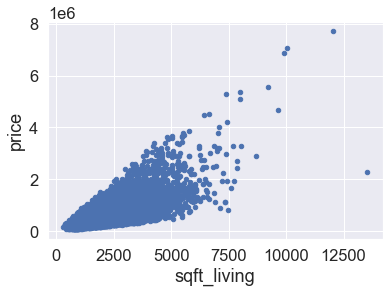

In [40]:
#Sqft_living vs precio
dataset.plot.scatter('sqft_living', 'price')

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


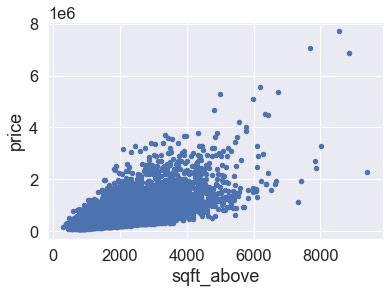

In [41]:
#Sqft_above vs precio
dataset.plot.scatter('sqft_above', 'price')

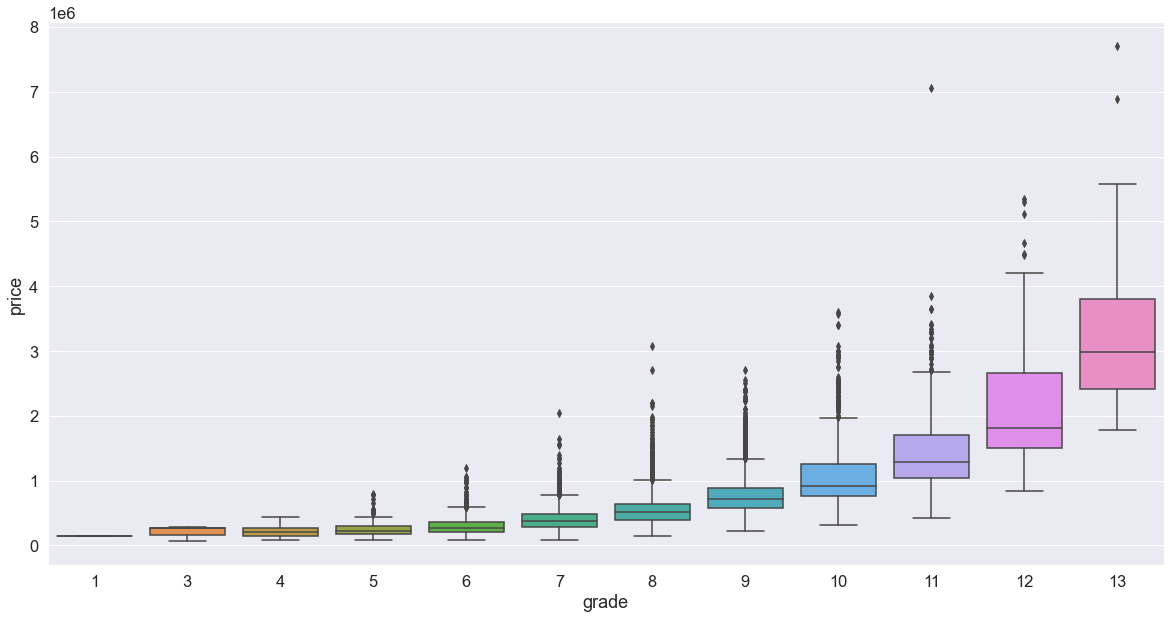

In [44]:
#Calificacion vs precio
f, ax = plt.subplots(figsize=(20, 10))
sns.boxplot(x=dataset['grade'], y=dataset['price'])

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


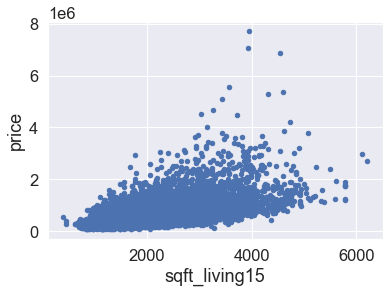

In [45]:
#Sqft_living15 vs precio
dataset.plot.scatter('sqft_living15', 'price')

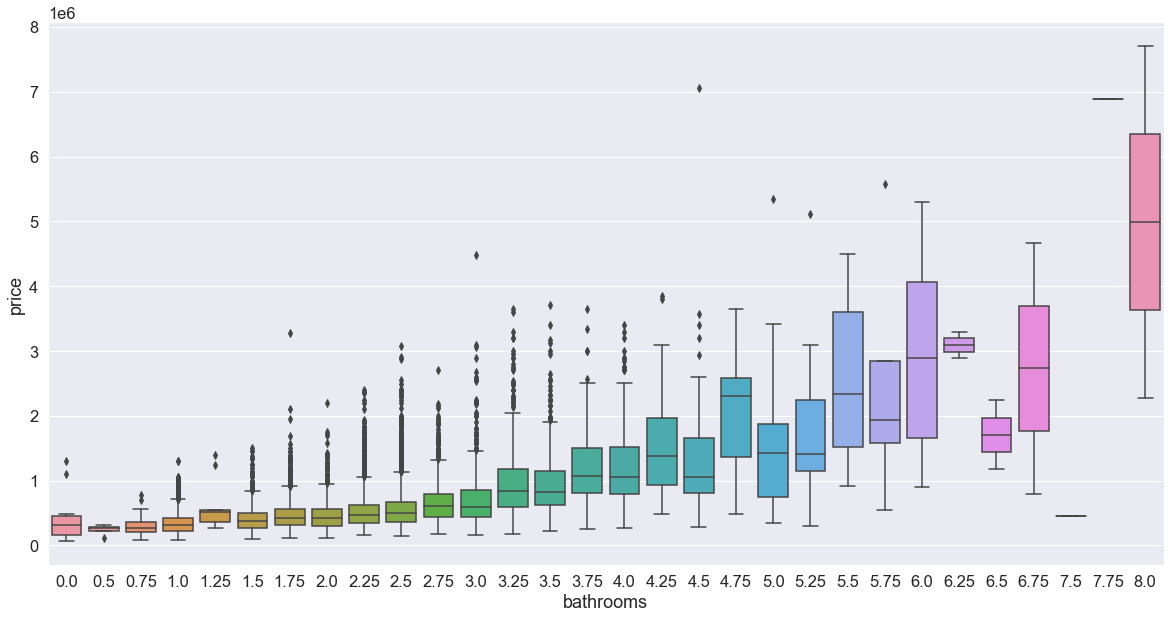

In [46]:
#Baños vs precio
f, ax = plt.subplots(figsize=(20, 10))
sns.boxplot(x=dataset['bathrooms'], y=dataset['price'])

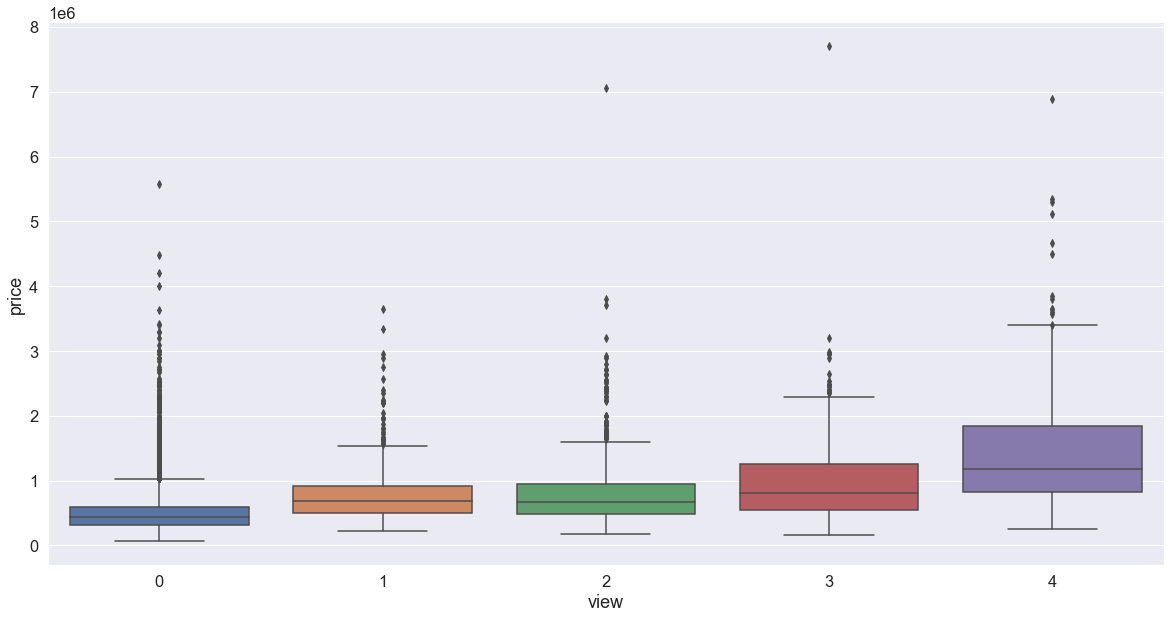

In [47]:
#Vista vs precio
f, ax = plt.subplots(figsize=(20, 10))
sns.boxplot(x=dataset['view'], y=dataset['price'])

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


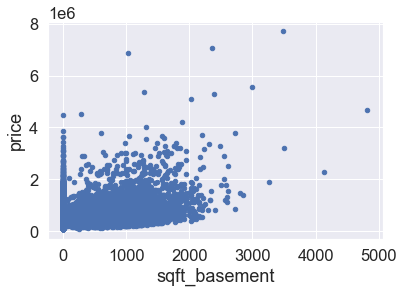

In [48]:
#Sqft_basement vs precio
dataset.plot.scatter('sqft_basement', 'price')

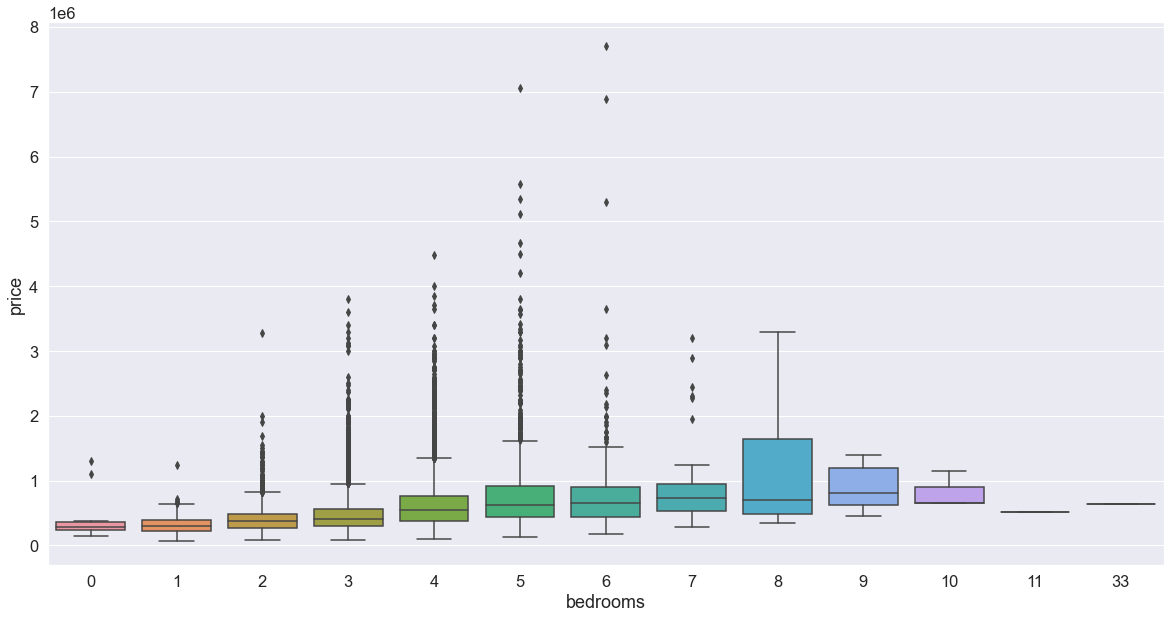

In [49]:
#Habitaciones vs precio
#df.plot.scatter('bedrooms', 'price')
f, ax = plt.subplots(figsize=(20, 10))
sns.boxplot(x=dataset['bedrooms'], y=dataset['price'])

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


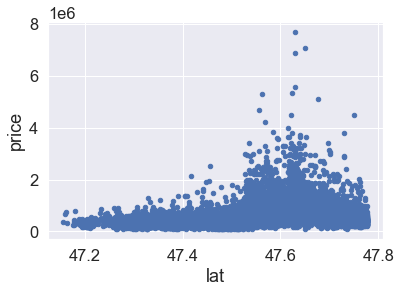

In [50]:
#Latitud vs precio
dataset.plot.scatter('lat', 'price')

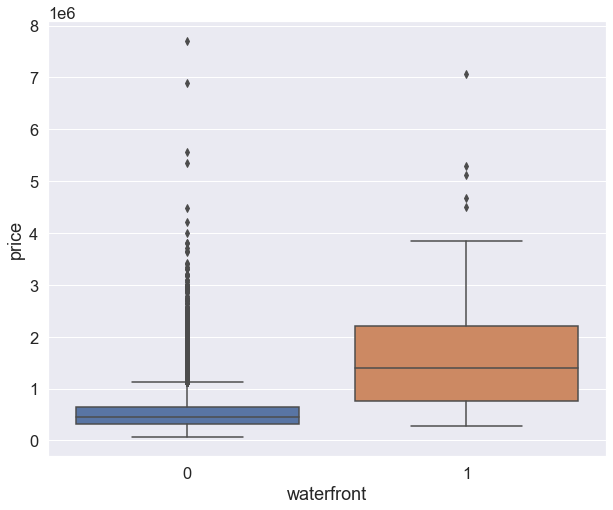

In [51]:
#Frente al mar vs precio
f, ax = plt.subplots(figsize=(10, 8))
sns.boxplot(x=dataset['waterfront'], y=dataset['price'])

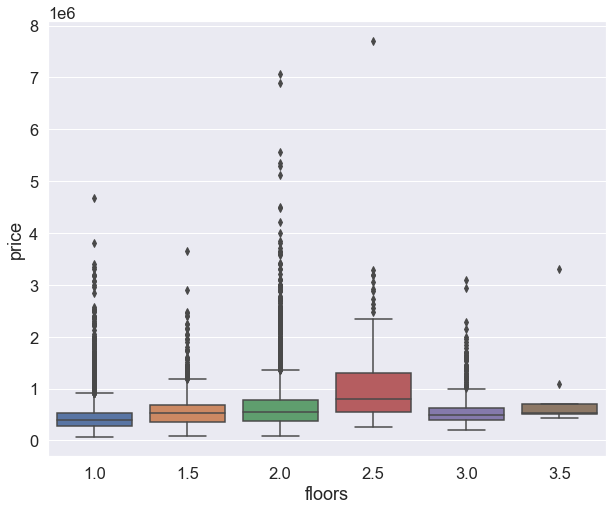

In [52]:
#Numero de pisos vs precio
f, ax = plt.subplots(figsize=(10, 8))
sns.boxplot(x=dataset['floors'], y=dataset['price'])